In [2]:
#%pylab qt5
#%precision 5
#set_printoptions(precision=5)
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (11, 7)
import networkx as nx
import numpy as np
import scipy
import matplotlib.cm as cm
import matplotlib.pyplot as plt

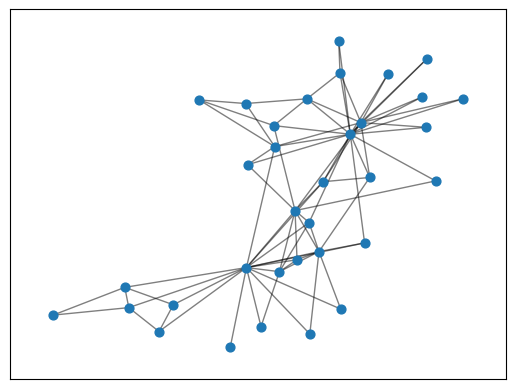

In [37]:
# load the karate club graph
G = nx.karate_club_graph()
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_nodes(G, pos, node_size=40)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [6]:
def phi(dist):
    """
    threshold function
    """
    if dist<1:
        res=1-dist
    else:
        res=0
    return res

In [3]:
def init():
    """
    Chooses a graph and assigns a number between -1 and 1 to each vertex
    """
    G = nx.karate_club_graph()
    for i in range(G.number_of_nodes()):
        G.nodes[i]['startval']=2*np.random.random()-1
    return G

In [7]:
def abl(t,arr):
    """
    The derivative function for solving the dynamics
    """
    inc=nx.incidence_matrix(G,oriented=True).toarray()
    v=[]
    for k in nx.edges(G):
        v=np.append(v,[phi(abs(arr[k[0]]-arr[k[1]]))])
    return -np.dot(np.matmul(np.matmul(inc,np.diag(v)),np.transpose(inc)),arr)

In [39]:
v=[]
for k in nx.edges(G):
    v=np.append(v,[phi(abs(y[k[0]]-y[k[1]]))])
dia=np.diag(v)

In [43]:
sol=scipy.integrate.solve_ivp(abl,[0,5],y,t_eval=[0,1,2,3,4,5])
print(sol.y)

[[-0.8        -0.54474674 -0.18367897 -0.13605511 -0.13346431 -0.13334922]
 [ 0.         -0.00649653 -0.11632008 -0.13240792 -0.13328877 -0.13332793]
 [ 0.4         0.15124327 -0.10000094 -0.13153696 -0.13324692 -0.13332285]]


/var/folders/mb/j4ltv8_d73q_cwpdwmzz5byw0000gn/T/ipykernel_3245/3994252088.py:5: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  inc=nx.incidence_matrix(G,oriented=True).toarray()


So now let us do one self-contained cell for solving the dynamics:

In [26]:
def sol(G):
    """
    solves the dynamics for a given graph and a random starting distribution
    """
    y=[] #start value
    for i in range(G.number_of_nodes()):
        y=np.append(y,3*np.random.random()-1.5) #ok, range 2 scheint zu niedrig zu sein, range 3 ist schon recht viel...
    return scipy.integrate.solve_ivp(abl,[0,100],y,t_eval=[100])

Now want to cluster the nodes by their final value. The following can be used to calculate clusters given a solution vector:

In [ ]:
sollim=sol(G)
cluster=np.zeros(G.number_of_nodes())
for i in range(G.number_of_nodes()):
    if cluster[i]==0:
        cluster[i]=np.max(cluster)+1
        for k in range(i,G.number_of_nodes()):
            if abs(sollim.y[i][0]-sollim.y[k][0])<0.001:
                cluster[k]=cluster[i]

Now we would like to represent such a partition:

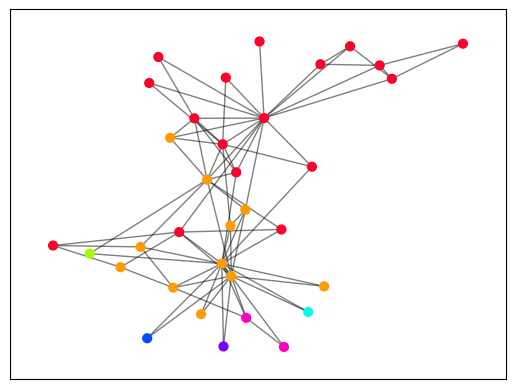

In [40]:
cmap = cm.get_cmap('gist_rainbow', int(np.max(cluster)+1))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, node_color=cluster)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
G=nx.karate_club_graph()
for i in range(G.number_of_nodes()):
    G.nodes[i]['clusterval']=sol(G).y[i][0]

In [35]:
cmap = cm.get_cmap('viridis', int(np.max(cluster)+1))


int